In [1]:
import numpy as np
import h5py
import pandas as pd

datadict = {}
with h5py.File("EnMAP_Contest_Data.mat", 'r') as f:
    for k, v in f.items():
        datadict[k] = np.array(v)

In [235]:
import numpy as np
import math

class MySOM:
    def __init__(self, datadict, label, nRows, nColumns, iteration, radius, learnrate):
        #init here
        self.datadict = datadict
        self.label = label
        self.nRows = nRows
        self.nColumns = nColumns
        self.radius_max = radius
        self.iteration_max = iteration - 1
        self.learnrate_max = learnrate

    def __str__(self):
        #toString()
        return "label: {0}, dimension: ({1} {2})".format(self.label, self.nRows, self.nColumns)

    def initializeNeurons(self):
        self.neurons = np.random.uniform(size=(self.nColumns, self.nRows, 244))
        self.labels = np.empty((self.nColumns, self.nRows), dtype=int)
        for i in range(len(self.labels)):
            for j in range(len(self.labels[0])):
                self.labels[i][j] = -1
        
        
    def toPixelsArray(self, field):
        pixels = []
        for i in range(len(self.datadict[field][0])):
            features = [row[i] for row in datadict[field]]
            pixels.append(features)
        return pixels
    
    def calculateVectorDistance(self, v1, v2):
        return np.linalg.norm(np.array(v1)-np.array(v2))
    
    def findBMU(self, point):
        bestX = 0
        bestY = 0
        bestDist = 10000000
        for x in range(len(self.neurons)):
            for y in range(len(self.neurons[0])):
                dist = self.calculateVectorDistance(point, self.neurons[x][y])
                if(dist < bestDist):
                    bestDist = dist
                    bestX = x
                    bestY = y
        return [bestX, bestY]
    
    def adaptNeighbours(self, bmuCoord, point, label, iteration):
        radius = self.radius_max * (1 - (iteration/self.iteration_max))
        for i in range(int(radius)):
            height = int(math.sqrt(radius**2 - i**2))
            for j in range(height):
                self.adaptNeuron(bmuCoord, [i + bmuCoord[0], j + bmuCoord[1]], point, label, iteration)
                if i!=0:
                    self.adaptNeuron(bmuCoord, [-i + bmuCoord[0], j + bmuCoord[1]], point, label, iteration)
                if j!=0:
                    self.adaptNeuron(bmuCoord, [i + bmuCoord[0], -j + bmuCoord[1]], point, label, iteration)
                if i!=0 and j!=0:
                    self.adaptNeuron(bmuCoord, [-i + bmuCoord[0], -j + bmuCoord[1]], point, label, iteration)
            
        
    def adaptNeuron(self, bmuCoord, neuronCoord, point, label, iteration):
        if neuronCoord[0]>=0 and neuronCoord[0] < self.nRows and neuronCoord[1]>=0 and neuronCoord[1] < self.nColumns:
            neuron = self.neurons[neuronCoord[0]][neuronCoord[1]]
            learnrate = self.learnrate_max * (1 - (iteration/self.iteration_max))
            radius = self.radius_max * (1 - (iteration/self.iteration_max))
            zaehler = self.calculateVectorDistance(bmuCoord, neuronCoord)**2
            nenner = 2 * radius**2
            neighbour = np.exp(-(zaehler/nenner))
            self.labels[neuronCoord[0]][neuronCoord[1]] = label
        
            for i in range(len(neuron)):
                neuron[i] = neuron[i] + learnrate * neighbour * (point[i] - neuron[i])
    
    def learnPoint(self, point, label, iteration):
        bmuCoord = self.findBMU(point)
        self.adaptNeighbours(bmuCoord, point, label, iteration)
        
    def fit(self, data, labels):
        for i in range(self.iteration_max):
            rand = np.random.randint(len(data))
            point = data[rand]
            label = labels[rand][0]
            self.learnPoint(point, label, i)
            if i%10 == 0: 
               print("Iteration {0} finished".format(i))
            
    def getLabels(self):
        return self.labels
    
    def predict(self, testData):
        result = []
        for i in range(len(testData)):
            bmuCoord = self.findBMU(testData[i])
            result.append(self.labels[bmuCoord[0]][bmuCoord[1]])
            if i%10 == 0: 
               print("Prediction {0} finished".format(i))
        return result

In [242]:
data = MySOM(datadict, "",50, 50, 1000, 20, 1)
data.initializeNeurons()

In [243]:
trainData = data.toPixelsArray("xi")
trainLabels = data.toPixelsArray("lx")
data.fit(trainData, trainLabels)

Iteration 0 finished
Iteration 10 finished
Iteration 20 finished
Iteration 30 finished
Iteration 40 finished
Iteration 50 finished
Iteration 60 finished
Iteration 70 finished
Iteration 80 finished
Iteration 90 finished
Iteration 100 finished
Iteration 110 finished
Iteration 120 finished
Iteration 130 finished
Iteration 140 finished
Iteration 150 finished
Iteration 160 finished
Iteration 170 finished
Iteration 180 finished
Iteration 190 finished
Iteration 200 finished
Iteration 210 finished
Iteration 220 finished
Iteration 230 finished
Iteration 240 finished
Iteration 250 finished
Iteration 260 finished
Iteration 270 finished
Iteration 280 finished
Iteration 290 finished
Iteration 300 finished
Iteration 310 finished
Iteration 320 finished
Iteration 330 finished
Iteration 340 finished
Iteration 350 finished
Iteration 360 finished
Iteration 370 finished
Iteration 380 finished
Iteration 390 finished
Iteration 400 finished
Iteration 410 finished
Iteration 420 finished
Iteration 430 finished

Hier die klassifizierte Karte visualisiert:


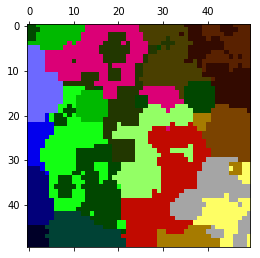

In [244]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(datadict["cm"].T)

plt.matshow(data.getLabels(), cmap=cmap)
print("Hier die klassifizierte Karte visualisiert:")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

prediction = data.predict(data.toPixelsArray("yi"))

Prediction 0 finished
Prediction 10 finished
Prediction 20 finished
Prediction 30 finished
Prediction 40 finished
Prediction 50 finished
Prediction 60 finished
Prediction 70 finished
Prediction 80 finished
Prediction 90 finished
Prediction 100 finished
Prediction 110 finished
Prediction 120 finished
Prediction 130 finished
Prediction 140 finished
Prediction 150 finished
Prediction 160 finished
Prediction 170 finished
Prediction 180 finished
Prediction 190 finished
Prediction 200 finished
Prediction 210 finished
Prediction 220 finished
Prediction 230 finished
Prediction 240 finished
Prediction 250 finished
Prediction 260 finished
Prediction 270 finished
Prediction 280 finished
Prediction 290 finished
Prediction 300 finished
Prediction 310 finished
Prediction 320 finished
Prediction 330 finished
Prediction 340 finished
Prediction 350 finished
Prediction 360 finished
Prediction 370 finished
Prediction 380 finished
Prediction 390 finished
Prediction 400 finished
Prediction 410 finished
Pre

In [241]:
print(accuracy_score(datadict["ly"][0], prediction))

0.692170818505
